In [ ]:
!jupyter nbconvert Week5_T1.ipynb --to slides --post serve

In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
from  sklearn import linear_model
import matplotlib.pyplot as plt

# AML Week5

## Supervised learning: linear regression


### topics

*   How to fit the best line?
    *   Loss function
    *   Gradient descent
* Preventing overfitting
* Polynomial regression
* Gradient descent
    *   (partial) derivatives


### Stof

* Chapter 2 Introduction to Machine Learning with Python
    * Until (and including) page 57.
* Section 4.5 and 4.6  Introduction to Machine Learning with Python
* [Data Science Handbook 5.06 linear regression](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.06-Linear-Regression.ipynb)
 

# Our problem this week

> find the best fitting line

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


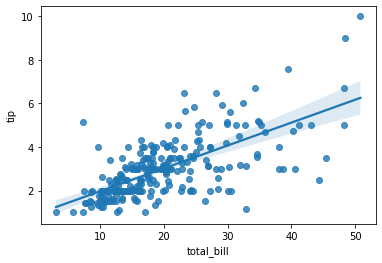

In [9]:
tips = sns.load_dataset('tips')
print(tips.shape)
sns.regplot(x='total_bill', y='tip', data=tips);
tips.head(2)

# Our task

### Given

* A lot of data instances with explanatory variables, `X`, and to be predicted numerical values `y`. 

### Find

* The "line", the linear model, best predicting `y` given `X`.

### When `X` has only one dimension (one column)

* find best **intercept** $a$ and **slope** $b$ such that $a+bx$ best predicts y.

### With more dimensions

$$ y= w_0 + w_1x_1 + w_2x_2+ ....w_nx_n$$

* find the best *hyperplane*
* simply find an intercept and a weight for each variable/feature.

# In 2 dimensions

![](https://online.stat.psu.edu/onlinecourses/sites/stat508/files/lesson02/image_01.gif)

# How we measure best?


* each $y_i$ is the **true value** for $x_i$
* each $h(x) = w_0 + w_1 x_i$ is the **predicted value** for $x_i$.
* Find those weights (intercept and slope) that **minimize sum of the squared errors**.

$$ \sum_{i=1}^{i=n}(h(x_i)-y_i)^2$$

$$h(x) = w_0 + w_1 x.$$

![](https://miro.medium.com/max/1222/1*jopCO2kMEI84s6fiGKdXqg.png) 

# How we measure best?

### Theoretically

* Thus find those $w_0$ and $w_1$ such that $\sum_{i=1}^{i=n}(h(x_i)-y_i)^2$ is **minimal**.

### Algorithmically
    
* A quadratic function $f$ is minimal at the point where the **derivitive** $f'$ equals 0
    
![](../img/quadratic_function.gif)  

# Find the minimum

* $f(x) = 2x^2 + 4x -6$.
* Then the **derivative** is $f'(x)= 4x+4$.
* Now find at which $x$, $f'(x)=0$. That is the minimal point of a quadratic function.
* Thus $4x+4=0$ exactly when $x=-1$. And at that point $y=f(x)= 2(-1)^2+ 4\cdot -1 -6$. That equals $-8$.

![](../img/quadratic_function.gif)  
![image.png](https://www.mathportal.org/math-tests/quadratic-equation-tests/graph-and-discriminant/1-2.png)

## Other technique: gradient descent

* later today

### Maar nog even, bereken de hoek en richting, de *gradient* op elk punt.


* Voor een lijn: De hoek, vertelt de schuinte, en de richting of het omhoog of naar beneden gaat.
* Bereken voor zeg punt $x=-2$
    1. Vul -2 in voor $x$ in de afgeleide ($f'(x)=4x+4$)
    2. Dus $f'(-2)=4\cdot -2 +4= -8+4=-4$.
    3. Dus de gradient op punt $x=-2$ is -4.
        * Dus de lijn gaat naar beneden.
        * als je 1 stapje naar rechts gaat, ga je 4 stapjes naar beneden.
            * Klopt! Want $f(-2)=-6$ en $f(-1)=-10$! 
            * En $f(-3)$?

### en de intercept van de raaklijn op $(x,y)$?

* Die is $y+ y_{min}$, met $y_{min}$ de minimale waarde van $y$  voor $f(x)$.
    * Dus die $y$ waar de afgeleide 0 is. 

# Best fitting function

* We found the best fitting function **to the data**,
* but we want a function which best **generalizes**, also to new unseen data.
* We should not **overfit** to the train data set.

#### When do we overfit?

* when we use many (all) features, and give them large weights.
    * a large weight can give even a meaningless variable with low value a big influence.
    
#### How to avoid this?

# How to avoid large weights? 

* Really easy: add the **sum of the weights** to the loss function.
* This is called **regularization**

### Fine tuning

1. How much do we want to let this "regulizer" count? => use a hyperparameter $\lambda$.
2. weights can be positive and negative
    * and can thus cancel each other out in a sum.
    * take *absolute values* : **lasso** or **l1** regularization $ \lambda \sum |w_i|$
    * take *squared values*: **ridge** or **l2** regularization $\lambda \sum w_i^2.$
3. Each weight counts equal. No good.
    * Solve by **standardization**
        * Z-transform each feature:
        * each feature has 0 mean and unit std.

# Linear regression if the data is not linear

![](../img/polynomial-regression.png)

# Adding Data transformations

* Section 4.5 and 4.6 of our book.
* Use: `PolynomialFeatures`

```
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 3:
# the default "include_bias=True" adds a feature that's constantly 1 
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
```

>Generate a new feature matrix consisting of **all polynomial combinations**
of the features with degree less than or equal to the specified degree.

* if an input sample is two dimensional and of the form
`[a, b]`, 
* the degree-2 polynomial features are `[1, a, b, a^2, ab, b^2]`.


# Linear regression if the data is not normally distributed


* Regession works best when each variable is approximately **normal distributed**.
* Many "count" variables are not
* but they often can be transformed into a normal distribution
* Eg, a variable X is  **log-normal distributed** if log X is normal distributed

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Log-normal-pdfs.png/600px-Log-normal-pdfs.png)

# Preprocessing

* Sec 4.6 in the book
* In fact, taking the logarithm, or another uniform transformation is just a preprocessing step, 
* not really differenty from Z-transformation.

### Example from book 4.6, with lognormal X

```
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
score
  0.622
```

#### Now take a log transform

```
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test) 
score
  0.875
```

# Scikit learn drill again

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. **Choose model hyperparameters by instantiating this class with desired values.**
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
   - Hier leer je de _vrije parameters_ van het model uit de (trainings) voorbeelden.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.


# Zoom in on step 2: Grid search 

* Finding the best **hyperparameter settings** for your data and model  combination.
* You do that using a **validation set**
    * Split data into three non overlapping parts: train, validation, test.
    * Only at the final evaluation step you use test (in best case just once)
    
### Many choices: really a grid of them

* how much regularization? ($\lambda$)
* what kind? Lasso or Ridge
* how many extra polynomials and interactions
* which variables to transform and how

##### With scikit learn's grid search you try them all out  

* train with those settings
* test on validation set

# Alternative to validation set : Cross validation 


**Of course, on the original train set.**

Handy when you are low on labelled data.

![](../img/Cross-Validation.png)

# Gradient descent

* One of the scariest topics in ML, because we have to ..... calculate!
    * taking derivatives
    * algebra

### What is it?

* A clever way of quickly finding the best regression line.

### Best regression line?

**What was that again?**

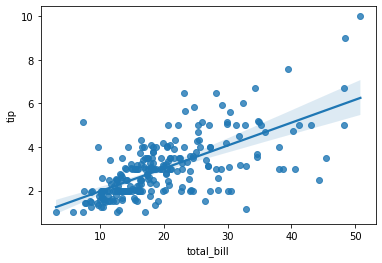

In [10]:
tips = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=tips);

# Best regression line given the data

* The line that **minimizes** the mean squared error.

$$ \frac{\sum (\hat{y_i}- y_i)^2}{n}$$

* where $\hat{y_i} = \theta_0 + \theta_1 x_i$, is the **predicted value** for $x_i$.

#### Thus find those $\theta_0$ and $\theta_1$  which give the smallest

$$ \frac{\sum ((\theta_0 + \theta_1 x_i)- y_i)^2}{n}$$

# Our goal

*  find those $\theta_0$ and $\theta_1$  which give the smallest

$$ \frac{\sum ((\theta_0 + \theta_1 x_i)- y_i)^2}{n}$$

###  simplify and reformulate

* vergeet die $\theta_0$ even
* eigenlijk is dan de $\theta_1$ de variabele, de rest (die $x_i$ en $y_i$) zijn allemaal constanten
* dus eigenlijk een functie van de vorm $y=ax^2 +bx +c$
* Hoe ziet die er ook alweer uit?

# Gradient descent

![](../img/gradientdescent.png)    

# Gradient 

* Wordt gegeven door de derivative, de **afgeleide**
* De afgeleide geeft de **hoek** en de **richting** van de curve op elk punt.
* De afgeleide van $4x^2 + 4x + 1$ is ....

* De afgeleide van $ax^2 +bx+c$ is $2ax+b$.

# Gradient descent in action

* We hebben een parabool gegeven door $f(x)= 4x^2 + 4x + 1$.
* De afgeleide is dus $f'(x)=8x+4$.
* Nu gaan we met gradient descent proberen in een aantal stapjes het minimun te vinden.

### Learning rate $\alpha$

* hoe grote stapjes neem je: *default* vaak  $0.01$.

### Gradient descent in stappen

* begin met een willekeurige $x$: hypothese: $f(x)$ is minimum.
* bereken $f(x)$, en bereken de waarde van de gradient op $x$, dus $f'(x)$. 
* nieuwe $x$ wordt dan oude $x- alpha \cdot f'(x)$
* ga door tot $x$ niet meer omlaag gaat (dan zit je dus op het minimum).

In [11]:
def step(x,alpha=.05): 
    '''Voor f(x)=4x**2 + 4x +1. '''
    gradient= 8*x +4
    return x - alpha * gradient

x=10
print("old x,gradient,new x")
for _ in range(20):
    print(round(x,2),round(8*x+4,1),round(step(x),2))
    x=step(x)

old x,gradient,new x
10 84 5.8
5.8 50.4 3.28
3.28 30.2 1.77
1.77 18.1 0.86
0.86 10.9 0.32
0.32 6.5 -0.01
-0.01 3.9 -0.21
-0.21 2.4 -0.32
-0.32 1.4 -0.39
-0.39 0.8 -0.44
-0.44 0.5 -0.46
-0.46 0.3 -0.48
-0.48 0.2 -0.49
-0.49 0.1 -0.49
-0.49 0.1 -0.5
-0.5 0.0 -0.5
-0.5 0.0 -0.5
-0.5 0.0 -0.5
-0.5 0.0 -0.5
-0.5 0.0 -0.5


# en inderdaad, het minimum ligt op .5

![](../img/gradientdescent2.png)   

# Eeh, 

* Dit hadden we toch ook gewoon direct kunnen uitrekenen?
* $8x+4=0 \Rightarrow 8x=-4 \Rightarrow x= - \frac{4}{8}=-.5$.
* Ja, hier wel, maar voor veel functies is dat helemaal niet zo direct of eenduidig.
* Dan is gradient descent een heel handig middel om dat minimum te vinden.

# Afronding en terug naar onze regressie

### doel

* Vind die $\theta$ zodat $$\frac{\sum( \theta \cdot x_i - y_i)^2}{n}$$ zo klein mogelijk is.
* we noemen dit de **loss functie** van theta. (ook wel **cost function**)
* de afgeleide is  (waarbij $e_i = \theta x_i - y_i$ de error, de fout,  gemaakt voor instantie $x_i$),
$$\frac{2\cdot\sum_{i=1}^{i=n} x_i\cdot e_i}{n}$$

# Even wat algebra en calculus

* $(\theta x_i -y_i)^2$ =
* $(\theta x_i)^2 - 2\theta x_i y_i + y_i^2$ =
* $\theta^2 x_i^2 - 2\theta x_i y_i + y_i^2$ 

Daar de afgeleide mbt $\theta$ van nemen wordt:

* $2x_i^2\theta - 2x_iy_i$ =
* $2x_i(\theta x_i - y_i)$ =  (want we noemen $\theta x_i - y_i$, gewoon de fout op $i$, dus $e_i$.
* $ 2 x_i \cdot e_i$.

# Met meer variabelen

* Met $n$ variabelen /features, hebben we deze regressie vergelijking

$$ \theta_0 + \theta_1x_1 + \ldots  \theta_nx_n = y.$$

* We moeten nu dus de optimale waardes vinden voor elke $\theta_i$.
* Dat doen we door **partiële afgeleides** te nemen, voor elke $\theta_i$.
    * je neemt dan de andere $\theta_j$ als constanten en 
    * dan  gaat het net zo als met 1 theta.

# Voorbeeld: vind het minimum

![](../img/grad_desc/gd1.png)

# Product regel voor afgeleiden

$$ (f(x)\cdot g(x))'= f'(x)\cdot g(x) + f(x)\cdot g'(x)$$

* $h(x) = 85- \frac{1}{90}x^2(x-6)y^2(y-6)$ 
* $h(x) =  c_1 +c_2 \cdot f(x)g(x)\cdot c_3$, with $f(x)=x^2$ and $g(x)=x-6$.
* Thus $h'(x)= c_2\cdot (f'(x)\cdot g(x) + f(x)\cdot g'(x))\cdot c_3$.
* Now $f'(x)=2x$ and $g'(x)=1$, thus $f'(x)\cdot g(x) + f(x)\cdot g'(x)$ =
* Now $2x\cdot (x-6) + x^2\cdot 1$ =
    * $2x^2- 12x + x^2$ =
    * $3x^2-12x$ =
    * $x\cdot(3x-12)$.

* Dus de partiele afgeleide tov $x$ = $c_2\cdot x\cdot(3x-12) \cdot c_3$ =

$$\frac{1}{90}x(3x-12)y^2(y-6).$$

# Opgave

1. Vind het minimum analytisch, door de afgeleides op 0 te zetten, en te berekenen voor welke waardes van x en y je 0 vindt.
    * Let op, je vindt meer waardes dan alleen het minimum. Je vindt alle plekken in de grafiek waarbij de afgeleide een horizontaal vlak is. 
    * Maar de meeste zijn "gek", en kan je zo wegredeneren.
2. Vind het met gradient descent, gebruikmakend van ons eerdere algoritme, maar nu met de 2 partiele afgeleides (gegeven op het plaatje).
    * Begin in  x=0.5, y=0.6, met $\alpha=0.05$. 
    * Hoe snel loop je naar beneden?

# Neural networks

* Over 2 weken
* We zullen zien dat het trainen van een neuraal netwerk eigenlijk net zo gaat.
* Alleen heb je dan gigantiasch veel parameters,
* en meestal een wat ingewikkelder loss/cost functie.

# Wat hebben we gedaan? Lineare Regressie.

1. Wat is het? Wat is het resultaat?
2. Wat is het optimalisatiecriterium? De loss/cost functie.
3. Hoe vinden we nou die beste lijn/hyperplane?
    * gradient descent
    
### Zij-onderwerpen

* Regularisatie: lasso en ridge
* hyperparameter tuning: grid search en cross validation
* Wat te doen als de data nou eenmaal "niet recht is"
    * Polynomials nemen van de input
    * combinaties van input feautues als niuew feature
    * feature naar normaal verdeling transformeren.
    